In [22]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

import sys

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sklearn as sk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error
import statsmodels.api as sm

In [2]:
podaci_38 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art38.parquet")

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
std_scaler = StandardScaler()

## **artikl 38**

### Odvajanje podataka u testni i trening set

In [4]:
X_train_38 = podaci_38.loc[podaci_38.index.get_level_values('datum') <= '2018-01-01']
X_train_ostalo_38 = X_train_38.drop('kol',axis=1)

X_test_38 = podaci_38.loc[podaci_38.index.get_level_values('datum') > '2018-01-01']
X_test_ostalo_38 = X_test_38.drop('kol',axis=1)

y_train_38 = X_train_38['kol']
y_test_38 = X_test_38['kol']

In [5]:
print (X_train_ostalo_38.shape, y_train_38.shape)
print (X_test_ostalo_38.shape, y_test_38.shape)

(685, 11) (685,)
(130, 11) (130,)


### Preprocesiranje **TRAINING** podataka

In [6]:
std_scaler.fit(X_train_ostalo_38)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
X_train_ostalo_38_scaled = std_scaler.transform(X_train_ostalo_38)

### Fittamo model na podacima trening seta

In [8]:
lm = linear_model.LinearRegression()
model_38 = lm.fit(X_train_ostalo_38_scaled, y_train_38)

In [9]:
predictions_38 = model_38.predict(X_train_ostalo_38_scaled)

In [10]:
print(X_train_ostalo_38_scaled)

[[ 0.16833315  0.16833315  0.69406834 ...  2.36358593 -0.40859588
   1.54631469]
 [ 0.16833315  0.16833315  0.52084628 ... -0.42308595  2.44740596
   1.54631469]
 [ 0.16833315  0.16833315  0.80954972 ... -0.42308595 -0.40859588
  -0.6466989 ]
 ...
 [ 0.16833315  0.16833315 -1.3268557  ... -0.42308595 -0.40859588
  -0.6466989 ]
 [ 0.16833315  0.16833315 -1.67329982 ...  2.36358593 -0.40859588
   1.54631469]
 [ 0.16833315  0.16833315 -1.55781845 ... -0.42308595  2.44740596
   1.54631469]]


In [11]:
model_38.score(X_train_ostalo_38_scaled, y_train_38)

0.20583037626498668

In [12]:
mae_38 = mean_absolute_error(y_train_38, predictions_38)  # mjera greške
mae_38

109.35294962969508

In [13]:
mse_38 = mean_squared_error(y_train_38, predictions_38)  # mjera greške
mse_38

19230.38231892297

In [46]:
rmse_38 = np.sqrt(mean_squared_error(y_train_38, predictions_38))  # mjera greške
rmse_38 # odlično! RADI TOČNO

138.67365401878962

### TEST 

In [31]:
X_test_ostalo_38_scaled = std_scaler.transform(X_test_ostalo_38)
y_pred_38 = model_38.predict(X_test_ostalo_38_scaled)

In [15]:
mae_38 = mean_absolute_error(y_test_38, y_pred_38)
mae_38

127.53858763063204

In [16]:
mse_38 = mean_squared_error(y_train_38, predictions_38)
mse_38

19230.38231892297

In [17]:
koeficijenti_38 = model_38.coef_
print("nagib je: ",koeficijenti_38)

odsjecak_38 = model_38.intercept_
print("odsječak je: ",odsjecak_38)

paramtetri_38 = model_38.get_params
print(paramtetri_38)

nagib je:  [-2.34697698e+14  2.34697698e+14  2.70214844e+01 -4.65115861e+13
 -4.55020946e+13 -4.57074222e+13 -4.69036882e+13 -4.65115861e+13
  7.73879891e+15  7.55093818e+15 -9.89429828e+15]
odsječak je:  253.60655742920835
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [29]:
predictions_38[0:5] # prvih pet predviđenih vrijednosti

array([401.60655743, 245.60655743, 228.60655743, 207.60655743,
       282.60655743])

In [33]:
y_test_38

art  datum     
38   2018-01-02    307.0
     2018-01-03    118.0
     2018-01-04    223.0
     2018-01-06    429.0
     2018-01-07     80.0
     2018-01-08    134.0
     2018-01-09     67.0
     2018-01-10    260.0
     2018-01-11    311.0
     2018-01-12    273.0
     2018-01-13    200.0
     2018-01-14    137.0
     2018-01-15    307.0
     2018-01-16      9.0
     2018-01-17     18.0
     2018-01-18    118.0
     2018-01-19    132.0
     2018-01-20    248.0
     2018-01-21     67.0
     2018-01-22    135.0
     2018-01-23      7.0
     2018-01-24     88.0
     2018-01-25    339.0
     2018-01-26    138.0
     2018-01-27    429.0
     2018-01-28    189.0
     2018-01-29     84.0
     2018-01-30    147.0
     2018-01-31    368.0
     2018-02-01    409.0
                   ...  
     2018-04-26    478.0
     2018-04-27    256.0
     2018-04-28    751.0
     2018-04-29    216.0
     2018-04-30    186.0
     2018-05-02    312.0
     2018-05-04    186.0
     2018-05-06    322.0
     2018

In [34]:
y_pred_38

array([  137.60655743,   210.60655743,   232.60655743,   333.60655743,
         189.60655743,   165.60655743,   140.60655743,   209.60655743,
         229.60655743,   212.60655743,   337.60655743,   181.60655743,
         159.60655743,   254.60655743,   172.60655743,   194.60655743,
         216.60655743,   341.60655743,   179.60655743,   165.60655743,
          70.60655743,   210.60655743,   240.60655743,   209.60655743,
         333.60655743,   179.60655743,   156.60655743,   140.60655743,
         214.60655743,   228.60655743,   203.60655743,   325.60655743,
         177.60655743,   136.60655743,   202.60655743,   204.60655743,
         325.60655743,   169.60655743,   128.60655743,   204.60655743,
         228.60655743,   209.60655743,   333.60655743,   169.60655743,
         145.60655743,   129.60655743,   203.60655743,   220.60655743,
         192.60655743,   325.60655743,   157.60655743,   142.60655743,
         116.60655743,   188.60655743,   215.60655743,   150.60655743,
      

In [19]:
koeficijenti_38.size 

11

In [42]:
y_test_38.head(15)

art  datum     
38   2018-01-02    307.0
     2018-01-03    118.0
     2018-01-04    223.0
     2018-01-06    429.0
     2018-01-07     80.0
     2018-01-08    134.0
     2018-01-09     67.0
     2018-01-10    260.0
     2018-01-11    311.0
     2018-01-12    273.0
     2018-01-13    200.0
     2018-01-14    137.0
     2018-01-15    307.0
     2018-01-16      9.0
     2018-01-17     18.0
Name: kol, dtype: float64

In [44]:
y_pred_38[75:]

array([  189.60655743,   216.60655743,   202.60655743,   325.60655743,
         120.60655743,   192.60655743,   220.60655743,   200.60655743,
         309.60655743,   159.60655743,   136.60655743,   190.60655743,
         212.60655743,   192.60655743,   313.60655743,   159.60655743,
         132.60655743,   115.60655743,   192.60655743,   216.60655743,
       -1733.39344257,   321.60655743,   167.60655743,   115.60655743,
         180.60655743,   208.60655743,   188.60655743,   313.60655743,
         161.60655743,   138.60655743,   189.60655743,   189.60655743,
         165.60655743,    60.60655743,   120.60655743,   186.60655743,
         188.60655743,   309.60655743,   153.60655743,   132.60655743,
         109.60655743,   180.60655743,   198.60655743,   305.60655743,
          56.60655743,   106.60655743,   180.60655743,   208.60655743,
         176.60655743,   309.60655743,   155.60655743,    90.60655743,
         108.60655743,   178.60655743,   201.60655743])

12 feature-a: <br> 
f((x1,...,x12)) = a1x1 +...+ a12x12 + b0

Text(0, 0.5, 'predviđene količine')

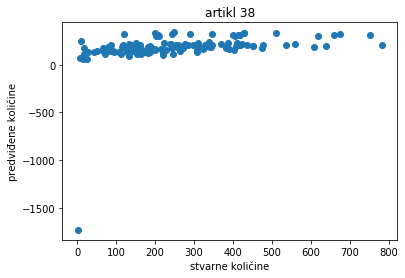

In [20]:
plt.scatter(y_test_38, y_pred_38)
plt.title("artikl 38")
plt.xlabel("stvarne količine")
plt.ylabel("predviđene količine")

In [21]:
r2_score(y_pred_38,y_test_38)

-0.43838387439806725

In [28]:
rmse_38 = np.sqrt(mean_squared_error(y_pred_38,y_test_38))
print(rmse_38)

216.23027356982115
